In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import docx
import os
import pandas as pd
import io
from PIL import Image
import pytesseract
from wand.image import Image as wi
import fnmatch
import re
import shutil
from sklearn.externals import joblib

c:\users\caio.santos\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def trainprepare(path):
    os.chdir(path)

    ndoc = 0
    docnum = []
    clausula = []
    text = []
    rex = re.compile('asdçlkasdçlkasdçlkasdçllkasdçlklasdçllkasdçllkasdçllkad')
    for d in fnmatch.filter(os.listdir(), '*.docx'):
        doc = docx.Document(d)
        ndoc += 1
        cl = 0
        stringx = []
        for p in doc.paragraphs:
            stringx.append(p.text)

        for string in re.split(rex, ''.join(stringx)):
            cl += 1
            docnum.append(ndoc)
            clausula.append(cl - 1)
            text.append(string)

    data = {'Doc': docnum, 'clausula': clausula, 'Text': text}
    df = pd.DataFrame(data=data)
    return df


def trainprepare_DF_series(data):
    docnum = []
    clausula = []
    text = []

    #rex = re.compile(r"cl[á,a]usula", flags=re.I)
    rex = re.compile(r"(par[á,a]grafo\s\d+?º)|(cl[á,a]usula)|(\w+?:\d+?\.\d+?\.)", flags=re.I)
    ndoc = 0
    for d in data:
        ndoc += 1
        cl = 0

        for string in re.split(rex, d):
            cl += 1
            docnum.append(ndoc)
            clausula.append(cl - 1)
            text.append(string)

    data = {'Doc': docnum, 'clausula': clausula, 'Text': text}
    df = pd.DataFrame(data=data)
    return df

In [4]:
stopw = 'de a o que e do da em um para é com não uma os no se na por mais as dos como mas foi ao ele das tem à seu sua ou ser quando muito há nos já está eu também só pelo pela até isso ela entre era depois sem mesmo aos ter seus quem nas me esse eles estão você tinha foram essa num nem suas meu às minha têm numa pelos elas havia seja qual será nós tenho lhe deles essas esses pelas este fosse dele tu te vocês vos lhes meus minhas teu tua teus tuas nosso nossa nossos nossas dela delas esta estes estas aquele aquela aqueles aquelas isto aquilo estou está estamos estão estive esteve estivemos estiveram estava estávamos estavam estivera estivéramos esteja estejamos estejam estivesse estivéssemos estivessem estiver estivermos estiverem hei há havemos hão houve houvemos houveram houvera houvéramos haja hajamos hajam houvesse houvéssemos houvessem houver houvermos houverem houverei houverá houveremos houverão houveria houveríamos houveriam sou somos são era éramos eram fui foi fomos foram fora fôramos seja sejamos sejam fosse fôssemos fossem for formos forem serei será seremos serão seria seríamos seriam tenho tem temos tém tinha tínhamos tinham tive teve tivemos tiveram tivera tivéramos tenha tenhamos tenham tivesse tivéssemos tivessem tiver tivermos tiverem terei terá teremos terão teria teríamos teriam'.split()

In [5]:
path = r"C:\Users\caio.santos\Desktop\NLP IFRS 16\Set IFRS 16 contracts.xlsx"
df = pd.read_excel(path, sheet_name=1)

In [6]:
x = df['Text']
y = df['Type']

In [7]:
x[1]

'TERMO ADITIVO Nº 01 AO CONTRATO 4600048985  Pelo presente Instrumento Particular e na melhor forma de direito, de um lado:  |) VALE FERTILIZANTES S.A., empresa com sede na cidade de Uberaba, Estado de Minas Gerais, na Estrada da Cana, km 11, Bairro Industrial de Uberaba, inscrita no CNPJ sob o n. 33.931.486/0014-55, neste ato representada na forma de seu Estatuto Social, doravante denominada como “CONTRATANTE”,  e, de outro lado,  *  ) TGB LOGÍSTICA INDUSTRIAL EIRELI, com sede na cidade de Belo Horizonte, Estado de Minas Gerais, na Av. Heraclito Mourão de Miranda, 2949, Bairro Santa Terezinha, inscrita no CNPJ sob o nº 00.059.822/0001-48, neste ato representada na forma de seu contrato social, doravante denominada como “CONTRATADA”,  RESOLVEM celebrar o presente Termo Aditivo nº 01 ao Contrato 4600048985 firmado entre as PARTES no dia 27 de Agosto de 2014 (doravante “ADITIVO”, que se regerá pelas seguintes cláusulas e condições:  CLÁUSULA PRIMEIRA - ADITAMENTO  A A CONTRATANTE e a CON

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=102)

In [9]:
SVCmodel = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopw, max_df=0.9, min_df=3)),('classify', LinearSVC())])


In [10]:
SVCmodel.fit(x,y)
predict = SVCmodel.predict(x)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

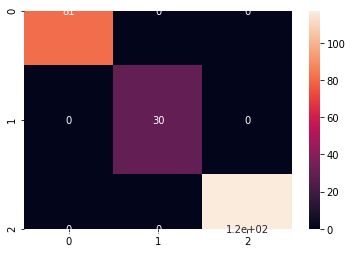

In [12]:
sns.heatmap(confusion_matrix(predict, y), annot=True)

In [13]:
print(classification_report(predict,y))

              precision    recall  f1-score   support

        ADIT       1.00      1.00      1.00        81
       ANEXO       1.00      1.00      1.00        30
      MASTER       1.00      1.00      1.00       117

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [14]:
df['Cl class'] = predict

In [15]:
from sklearn.externals import joblib

In [16]:
joblib.dump(SVCmodel,'Master_aditiv_classifier')

['Master_aditiv_classifier']

In [19]:
model = joblib.load('Master_aditiv_classifier')

In [20]:
pred = model.predict(x)